## CMPINF 2100 Week 06

### Creating bar charts with Pandas

This week we have seen how to use matplotlib to **organize** our plots. We saw the difference between the FIGURE and AXES objects. But I will very rarely create plots in matplotlib directly. Instead **statistics plots** such as the BAR CHART will be created using Pandas or Seaborn. This notebook shows how to use Pandas.

## Import Modules

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

In [5]:
import seaborn as sns

## Read data

We will use the gap minder data set and the penguins data set for this notebook.

In [2]:
gap_url = 'https://raw.githubusercontent.com/chendaniely/pandas_for_everyone/master/data/gapminder.tsv'

In [3]:
gap_df = pd.read_csv( gap_url, sep = '\t' )

In [4]:
gap_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1704 entries, 0 to 1703
Data columns (total 6 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   country    1704 non-null   object 
 1   continent  1704 non-null   object 
 2   year       1704 non-null   int64  
 3   lifeExp    1704 non-null   float64
 4   pop        1704 non-null   int64  
 5   gdpPercap  1704 non-null   float64
dtypes: float64(2), int64(2), object(2)
memory usage: 80.0+ KB


In [6]:
penguins = sns.load_dataset('penguins')

In [7]:
penguins.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 344 entries, 0 to 343
Data columns (total 7 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   species            344 non-null    object 
 1   island             344 non-null    object 
 2   bill_length_mm     342 non-null    float64
 3   bill_depth_mm      342 non-null    float64
 4   flipper_length_mm  342 non-null    float64
 5   body_mass_g        342 non-null    float64
 6   sex                333 non-null    object 
dtypes: float64(4), object(3)
memory usage: 18.9+ KB


## Gapminder

The previous recording stated which variables are categorical vs continuous and the number of unique values per column.

In [8]:
gap_df.dtypes

country       object
continent     object
year           int64
lifeExp      float64
pop            int64
gdpPercap    float64
dtype: object

In [9]:
gap_df.nunique()

country       142
continent       5
year           12
lifeExp      1626
pop          1704
gdpPercap    1704
dtype: int64

We already know how to **COUNT** the number of rows per category of a categorical variable!

In [10]:
gap_df.continent.value_counts()

Africa      624
Asia        396
Europe      360
Americas    300
Oceania      24
Name: continent, dtype: int64

Confirm `.value_counts()` is actually working.

In [11]:
gap_df.loc[ gap_df.continent == 'Oceania', : ].shape

(24, 6)

In [12]:
gap_df.loc[ gap_df.continent == 'Asia', : ].shape

(396, 6)

In [13]:
gap_df.isna().sum()

country      0
continent    0
year         0
lifeExp      0
pop          0
gdpPercap    0
dtype: int64

Let's now visualize the counts with a BAR CHART!!!!!!

Although matplotlib will manage the figure...we will NOT call a matplotlib function to generate the plot!

Let's use Pandas plotting methods to make the bar chart!

We must still begin by DEFINING the object oriented style figure and axes objects! 

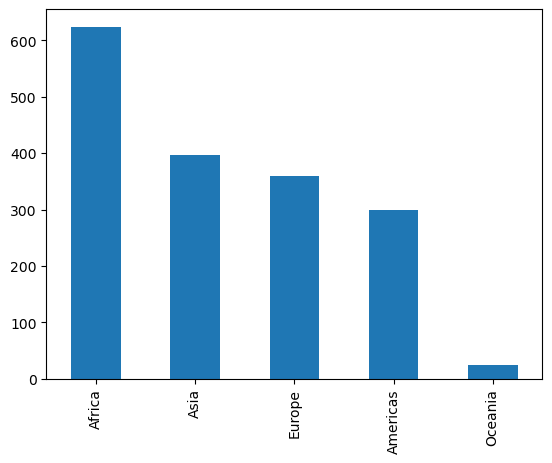

In [14]:
fig, ax = plt.subplots()

gap_df.continent.value_counts().plot( kind='bar', ax=ax )

plt.show()

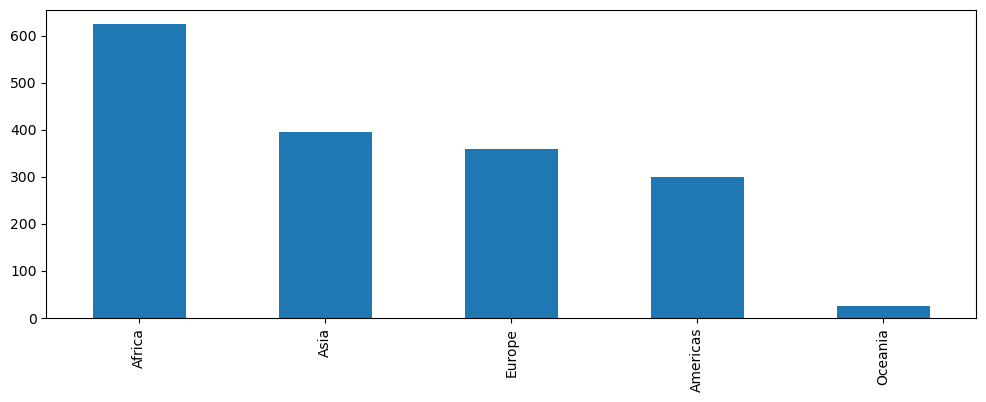

In [15]:
fig, ax = plt.subplots(figsize=(12, 4))

gap_df.continent.value_counts().plot( kind='bar', ax=ax )

plt.show()

The text can be made easier to read by showing a HORIZONTAL bar chart!!!!!

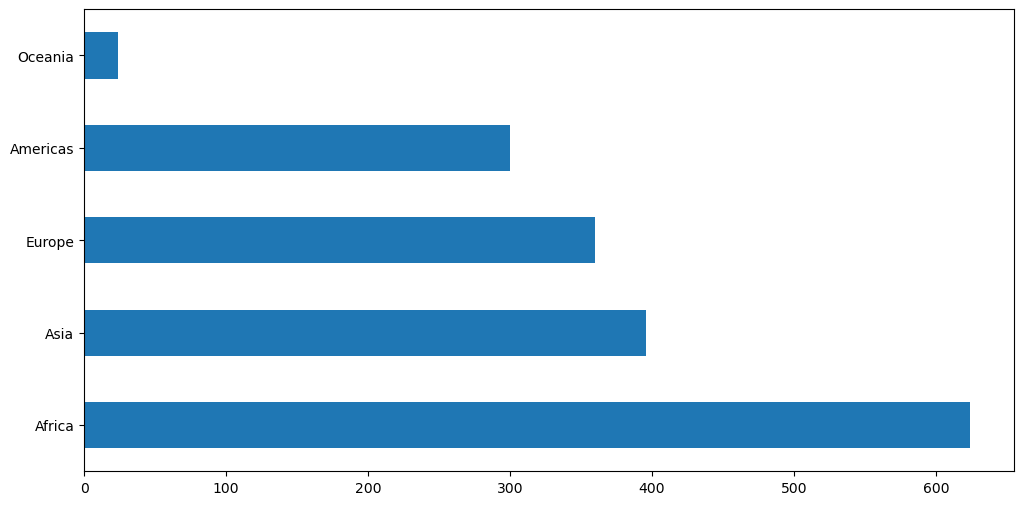

In [16]:
fig, ax = plt.subplots(figsize=(12, 6))

gap_df['continent'].value_counts().plot(kind='barh', ax=ax)

plt.show()

Sometimes you want to show the PROPORTION rather than the count.

In [17]:
gap_df.continent.value_counts(normalize=True)

Africa      0.366197
Asia        0.232394
Europe      0.211268
Americas    0.176056
Oceania     0.014085
Name: continent, dtype: float64

A proportional bar chart is created by applying the `.plot()` method to the **normalized** `.value_counts()` result!

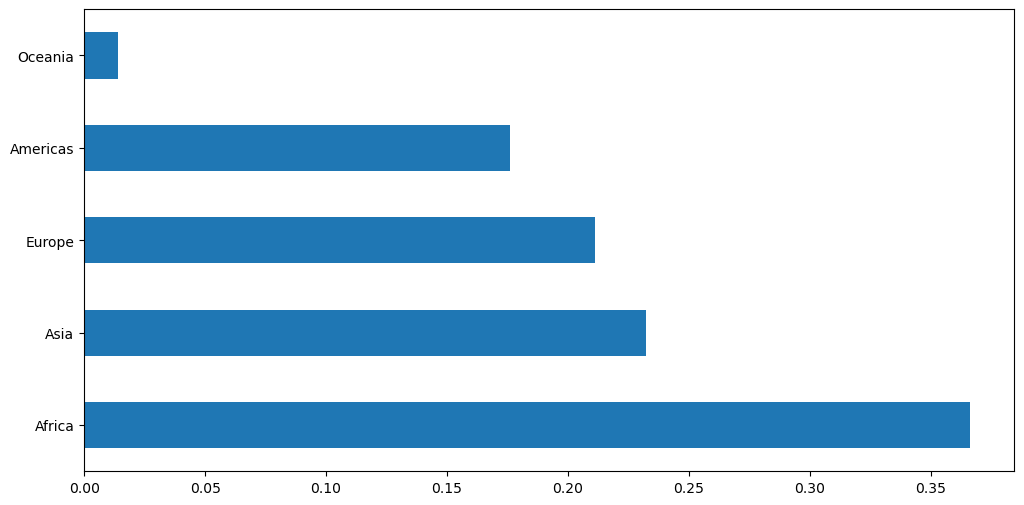

In [18]:
fig, ax = plt.subplots(figsize=(12, 6))

gap_df.continent.value_counts(normalize=True).plot(kind='barh', ax=ax)

plt.show()

You must visualize the BAR CHART for EVERY SINGLE categorical variable! 

But you must explore every variable!!!!

Let's now examine the other categorical variable, `country`.

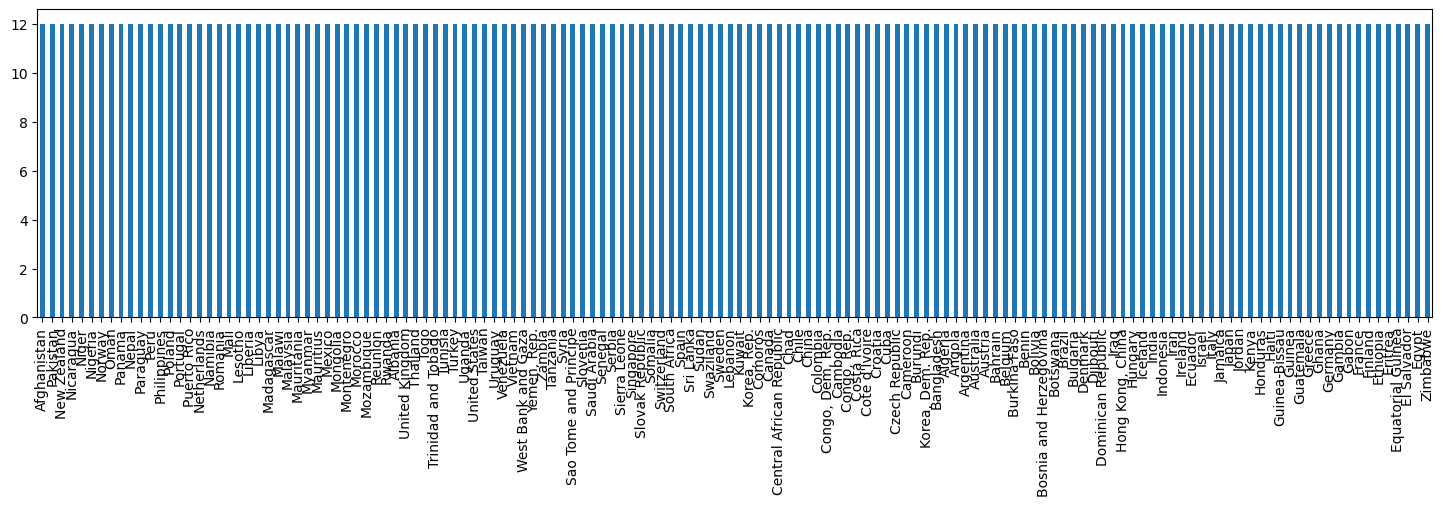

In [20]:
fig, ax = plt.subplots(figsize=(18, 4))

gap_df.country.value_counts().plot(kind='bar', ax=ax)

plt.show()

In [21]:
gap_df.country.value_counts()

Afghanistan          12
Pakistan             12
New Zealand          12
Nicaragua            12
Niger                12
                     ..
Eritrea              12
Equatorial Guinea    12
El Salvador          12
Egypt                12
Zimbabwe             12
Name: country, Length: 142, dtype: int64

In [23]:
gap_df.country.value_counts().value_counts()

12    142
Name: country, dtype: int64

In [24]:
gap_df.nunique()

country       142
continent       5
year           12
lifeExp      1626
pop          1704
gdpPercap    1704
dtype: int64

Let's count the number of rows per `year` value and visualize as if it is categorical.

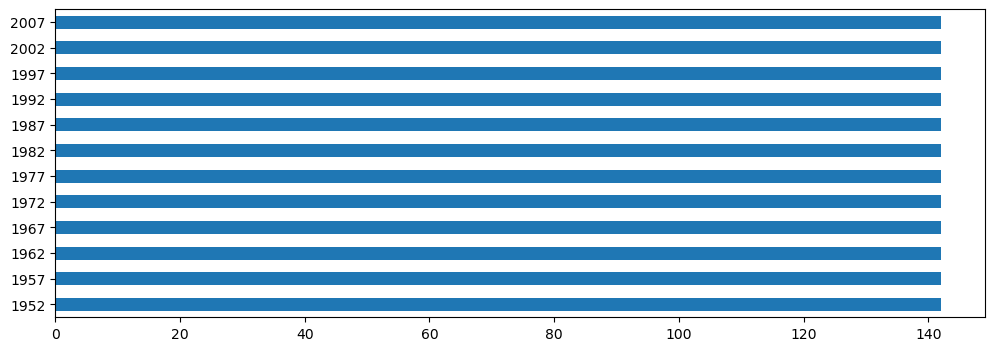

In [26]:
fig, ax = plt.subplots(figsize=(12, 4))

gap_df.year.value_counts().plot( kind='barh', ax=ax )

plt.show()

In [27]:
gap_df.year.value_counts().value_counts()

142    12
Name: year, dtype: int64

In [28]:
gap_df.shape

(1704, 6)

In [29]:
142 * 12

1704

we have learned one row in `gap_df` is therefore a single country within a single year!

In [30]:
gap_df

,country,continent,year,lifeExp,pop,gdpPercap
0,Afghanistan,Asia,1952,28.801,8425333,779.445314
1,Afghanistan,Asia,1957,30.332,9240934,820.853030
2,Afghanistan,Asia,1962,31.997,10267083,853.100710
3,Afghanistan,Asia,1967,34.020,11537966,836.197138
4,Afghanistan,Asia,1972,36.088,13079460,739.981106
...,...,...,...,...,...,...
1699,Zimbabwe,Africa,1987,62.351,9216418,706.157306
1700,Zimbabwe,Africa,1992,60.377,10704340,693.420786
1701,Zimbabwe,Africa,1997,46.809,11404948,792.449960
1702,Zimbabwe,Africa,2002,39.989,11926563,672.038623


## Penguins data set

In [31]:
penguins.dtypes

species               object
island                object
bill_length_mm       float64
bill_depth_mm        float64
flipper_length_mm    float64
body_mass_g          float64
sex                   object
dtype: object

In [32]:
penguins.nunique()

species                3
island                 3
bill_length_mm       164
bill_depth_mm         80
flipper_length_mm     55
body_mass_g           94
sex                    2
dtype: int64

In [33]:
penguins.sex.value_counts()

Male      168
Female    165
Name: sex, dtype: int64

In [34]:
penguins.sex.value_counts(normalize=True)

Male      0.504505
Female    0.495495
Name: sex, dtype: float64

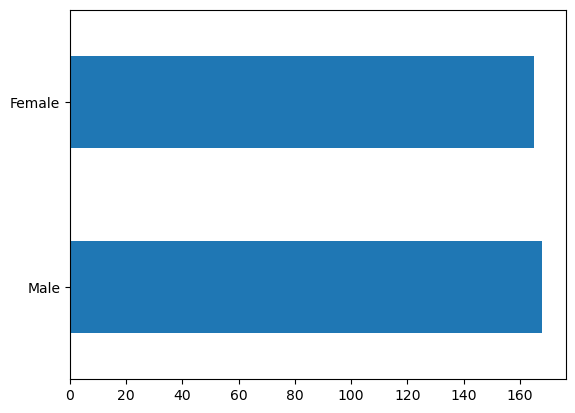

In [36]:
fig, ax = plt.subplots()

penguins.sex.value_counts().plot( kind='barh', ax=ax )

plt.show()

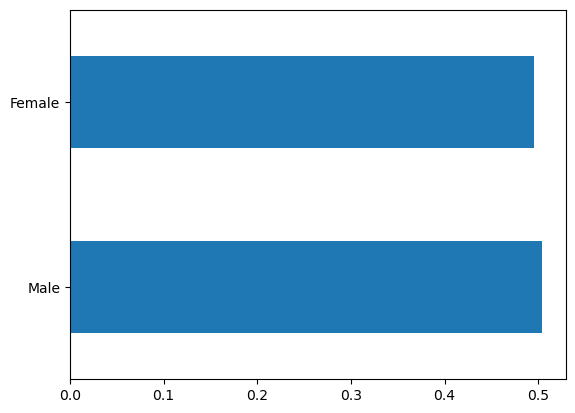

In [37]:
fig, ax = plt.subplots()

penguins.sex.value_counts(normalize=True).plot( kind='barh', ax=ax )

plt.show()

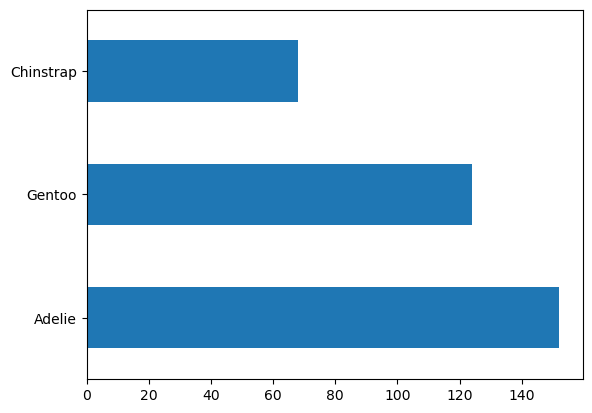

In [39]:
fig, ax = plt.subplots()

penguins.species.value_counts().plot( kind= 'barh', ax=ax)

plt.show()

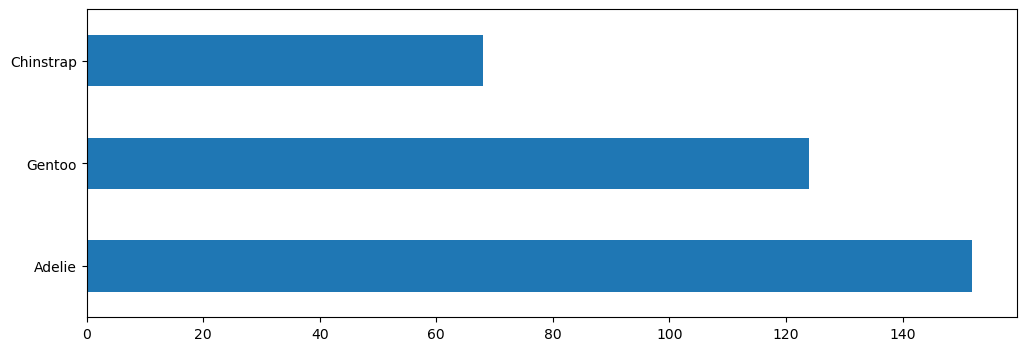

In [43]:
fig, ax = plt.subplots(figsize=(12, 4))

penguins.species.value_counts(dropna=False).plot( kind='barh', ax=ax )

plt.show()

In [44]:
penguins.isna().sum()

species               0
island                0
bill_length_mm        2
bill_depth_mm         2
flipper_length_mm     2
body_mass_g           2
sex                  11
dtype: int64

Let's make the bar chart for the `sex` again but this time DO NOT remove the missings!!!

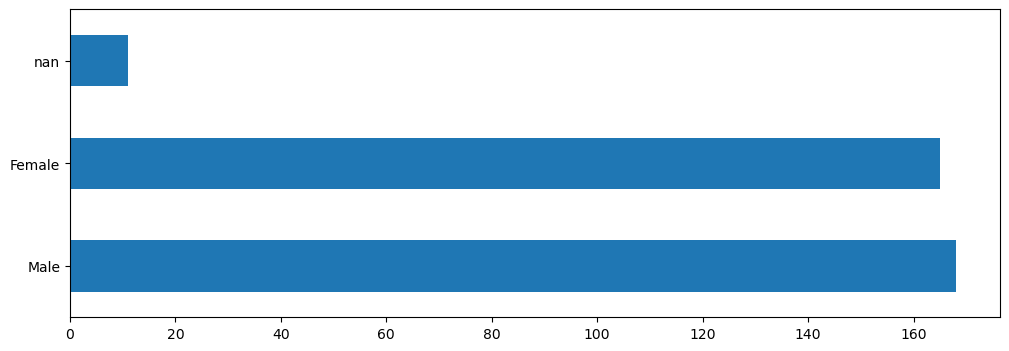

In [45]:
fig, ax = plt.subplots(figsize=(12, 4))

penguins.sex.value_counts(dropna=False).plot( kind='barh', ax=ax )

plt.show()

Let's look at the `island` variable.

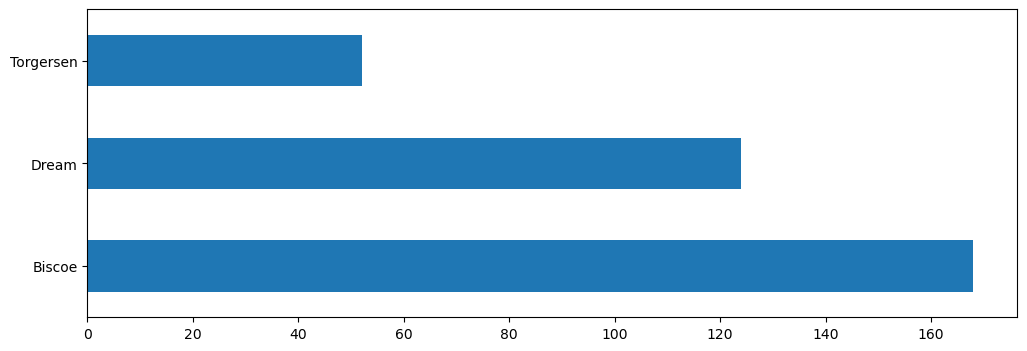

In [46]:
fig, ax = plt.subplots(figsize=(12, 4)) 

penguins.island.value_counts(dropna=False).plot( kind='barh', ax=ax )

plt.show()